Epoch 1 | Loss: 0.1195
Epoch 2 | Loss: 0.1185
Epoch 3 | Loss: 0.1176
Epoch 4 | Loss: 0.1167
Epoch 5 | Loss: 0.1159
Epoch 6 | Loss: 0.1150
Epoch 7 | Loss: 0.1142
Epoch 8 | Loss: 0.1135
Epoch 9 | Loss: 0.1128
Epoch 10 | Loss: 0.1121
Epoch 11 | Loss: 0.1114
Epoch 12 | Loss: 0.1108
Epoch 13 | Loss: 0.1102
Epoch 14 | Loss: 0.1096
Epoch 15 | Loss: 0.1091
Epoch 16 | Loss: 0.1085
Epoch 17 | Loss: 0.1080
Epoch 18 | Loss: 0.1076
Epoch 19 | Loss: 0.1071
Epoch 20 | Loss: 0.1067
Epoch 21 | Loss: 0.1063
Epoch 22 | Loss: 0.1059
Epoch 23 | Loss: 0.1055
Epoch 24 | Loss: 0.1052
Epoch 25 | Loss: 0.1048
Epoch 26 | Loss: 0.1045
Epoch 27 | Loss: 0.1042
Epoch 28 | Loss: 0.1040
Epoch 29 | Loss: 0.1037
Epoch 30 | Loss: 0.1034
Epoch 31 | Loss: 0.1032
Epoch 32 | Loss: 0.1030
Epoch 33 | Loss: 0.1028
Epoch 34 | Loss: 0.1026
Epoch 35 | Loss: 0.1024
Epoch 36 | Loss: 0.1022
Epoch 37 | Loss: 0.1020
Epoch 38 | Loss: 0.1019
Epoch 39 | Loss: 0.1017
Epoch 40 | Loss: 0.1016
Epoch 41 | Loss: 0.1015
Epoch 42 | Loss: 0.1013
E

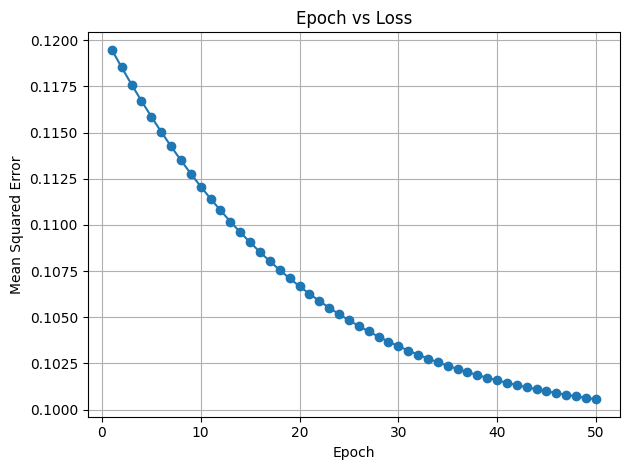

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ──────────────────────
# Step 1: Prepare data
# ──────────────────────
X = np.array([
    [5, 54, 24],
    [8, 68, 6],
    [9, 91, 100]
], dtype=float)

y = np.array([[12], [16], [42]], dtype=float)

# Feature scaling (0 to 1)
X = X / np.max(X, axis=0)
y = y / np.max(y)

# ──────────────────────
# Step 2: Define NN class
# ──────────────────────
class TwoHiddenNN:
    def __init__(self):
        self.inputSize = 3
        self.hidden1Size = 3
        self.hidden2Size = 3
        self.outputSize = 1
        self.lr = 0.1  # learning rate

        # Weights initialization
        self.W1 = np.random.rand(self.inputSize, self.hidden1Size)
        self.W2 = np.random.rand(self.hidden1Size, self.hidden2Size)
        self.W3 = np.random.rand(self.hidden2Size, self.outputSize)

        self.losses = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3)
        self.output = self.sigmoid(self.z3)

        return self.output

    def backward(self, X, y, output):
        # Output layer error
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        # Hidden layer 2 error
        self.a2_error = self.output_delta.dot(self.W3.T)
        self.a2_delta = self.a2_error * self.sigmoid_derivative(self.a2)

        # Hidden layer 1 error
        self.a1_error = self.a2_delta.dot(self.W2.T)
        self.a1_delta = self.a1_error * self.sigmoid_derivative(self.a1)

        # Update weights
        self.W3 += self.lr * self.a2.T.dot(self.output_delta)
        self.W2 += self.lr * self.a1.T.dot(self.a2_delta)
        self.W1 += self.lr * X.T.dot(self.a1_delta)

    def train(self, X, y, epochs=50):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(y - output))
            self.losses.append(loss)
            print(f"Epoch {i+1} | Loss: {loss:.4f}")

    def plot_loss(self):
        plt.plot(range(1, len(self.losses)+1), self.losses, marker='o')
        plt.title("Epoch vs Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# ──────────────────────
# Step 3: Train and plot
# ──────────────────────
model = TwoHiddenNN()
model.train(X, y, epochs=50)
model.plot_loss()
